# 理解RNN

## 1. SimpleRNN with IMDB

### 准备数据

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  
maxlen = 500  
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### 构建模型

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 759us/step - loss: 0.6385 - acc: 0.6176 - val_loss: 0.4613 - val_acc: 0.8086
Epoch 2/10
20000/20000 [==============================] - 14s 686us/step - loss: 0.4098 - acc: 0.8273 - val_loss: 0.3626 - val_acc: 0.8532
Epoch 3/10
20000/20000 [==============================] - 14s 699us/step - loss: 0.3118 - acc: 0.8754 - val_loss: 0.3660 - val_acc: 0.8412
Epoch 4/10
20000/20000 [==============================] - 14s 688us/step - loss: 0.2499 - acc: 0.9028 - val_loss: 0.3409 - val_acc: 0.8642
Epoch 5/10
20000/20000 [==============================] - 14s 690us/step - loss: 0.2046 - acc: 0.9216 - val_loss: 0.4384 - val_acc: 0.8040
Epoch 6/10
20000/20000 [==============================] - 14s 690us/step - loss: 0.1689 - acc: 0.9380 - val_loss: 0.3953 - val_acc: 0.84

### 评估模型

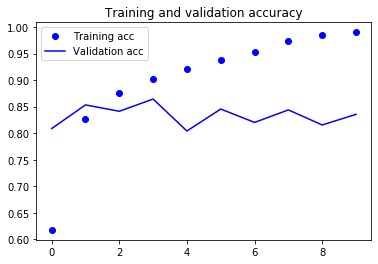

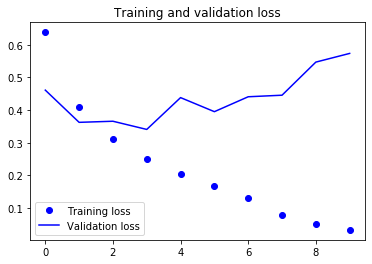

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

从上图可以看出，验证集大概有85%的准确率，可能存在的问题是输入只考虑前500个单词，而不是整个序列。

此外，SimpleRNN并不擅长处理长文本。

## 2. LSTM with IMDB

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.5067 - acc: 0.7624 - val_loss: 0.4129 - val_acc: 0.8252
Epoch 2/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.2957 - acc: 0.8856 - val_loss: 0.2992 - val_acc: 0.8772
Epoch 3/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.2332 - acc: 0.9112 - val_loss: 0.2813 - val_acc: 0.8930
Epoch 4/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1953 - acc: 0.9279 - val_loss: 0.3715 - val_acc: 0.8716
Epoch 5/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1729 - acc: 0.9371 - val_loss: 0.3327 - val_acc: 0.8774
Epoch 6/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1555 - acc: 0.9429 - val_loss: 0.4101 - val_acc: 0.8780
Epoch 7/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1393 - acc: 0.9505 - val_loss: 0.7482 - val_acc:

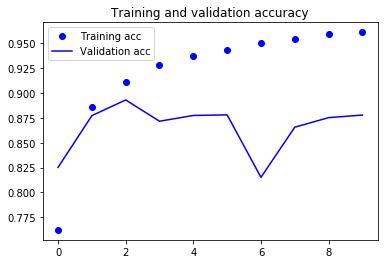

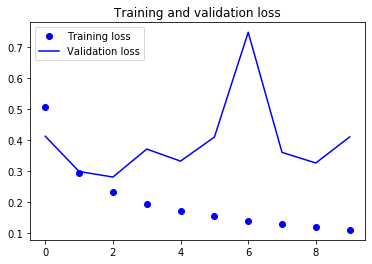

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

由上图可知，使用LSTM后，准确率有一定程度的提升。